# Modelos de Regresión para Conteos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot

| Column Name  | Data Type | Description                                                                                                                                                                              |
|--------------|-----------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| stops        | Integer   | The number of police stops between January 1998 and March 1999, for each combination of precinct, ethnicity and type of crime.                                                           |
| pop          | Integer   | The population.                                                                                                                                                                          |
| past.arrests | Integer   | The number of arrests that took place in 1997 for each combination of precinct, ethnicity and type of crime.                                                                             |
| precinct     | Integer   | Index for the precinct (1-75).                                                                                                                                                           |
| eth          | Integer   | Indicator for ethnicity, black (1), hispanic (2), white (3). Other ethnic groups were excluded because ambiguities in the classification would cause large distortions in the analysis2. |
| crime        | Integer   | Indicator for the type, violent (1), weapons (2), property (3), drug (4).                                                                                                                |

In [2]:
path = "../data/frisk_with_noise.dat"
# El archivo tiene 6 líneas de encabezado de texto antes de los datos
df = pd.read_csv(path, skiprows=6, delimiter=" ")
df.head()

,stops,pop,past.arrests,precinct,eth,crime
0,75,1720,191,1,1,1
1,36,1720,57,1,1,2
2,74,1720,599,1,1,3
3,17,1720,133,1,1,4
4,37,1368,62,1,2,1


In [3]:
df.\
    groupby(['eth', 'precinct'])[["stops", "past.arrests"]].\
    sum().reset_index().sort_values(by='stops').reset_index(drop=True)

,eth,precinct,stops,past.arrests
0,1,75,7,16
1,3,51,7,97
2,3,28,9,338
3,3,43,11,115
4,3,48,11,44
...,...,...,...,...
220,2,72,2467,2166
221,1,73,2492,3468
222,1,60,2500,4209
223,1,45,2705,4540


In [4]:
X = (df
    .groupby(['eth', 'precinct'])[["stops", "past.arrests"]]
    .sum()
    .reset_index()
    .pipe(pd.get_dummies, columns=['eth', 'precinct'])
    .assign(intercept=1)  # Adds a column called 'intercept' with all values equal to 1.
    .sort_values(by='stops')
    .reset_index(drop=True).replace({True:1, False:0})
)

y = X.pop("stops")


In [5]:
X.sample(10)

,past.arrests,eth_1,eth_2,eth_3,precinct_1,precinct_2,precinct_3,precinct_4,precinct_5,precinct_6,...,precinct_67,precinct_68,precinct_69,precinct_70,precinct_71,precinct_72,precinct_73,precinct_74,precinct_75,intercept
63,588,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55,753,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
140,597,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
188,1580,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
159,1813,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
173,1079,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49,212,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
184,849,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
64,229,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
93,1724,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
y.sample(10)

67      178
33       81
40      107
95      275
68      183
155     675
133     517
46      117
203    1495
86      242
Name: stops, dtype: int64

In [45]:
form = " + ".join(X.drop("intercept",axis=1).columns) 
print(form)

past.arrests + eth_1 + eth_2 + eth_3 + precinct_1 + precinct_2 + precinct_3 + precinct_4 + precinct_5 + precinct_6 + precinct_7 + precinct_8 + precinct_9 + precinct_10 + precinct_11 + precinct_12 + precinct_13 + precinct_14 + precinct_15 + precinct_16 + precinct_17 + precinct_18 + precinct_19 + precinct_20 + precinct_21 + precinct_22 + precinct_23 + precinct_24 + precinct_25 + precinct_26 + precinct_27 + precinct_28 + precinct_29 + precinct_30 + precinct_31 + precinct_32 + precinct_33 + precinct_34 + precinct_35 + precinct_36 + precinct_37 + precinct_38 + precinct_39 + precinct_40 + precinct_41 + precinct_42 + precinct_43 + precinct_44 + precinct_45 + precinct_46 + precinct_47 + precinct_48 + precinct_49 + precinct_50 + precinct_51 + precinct_52 + precinct_53 + precinct_54 + precinct_55 + precinct_56 + precinct_57 + precinct_58 + precinct_59 + precinct_60 + precinct_61 + precinct_62 + precinct_63 + precinct_64 + precinct_65 + precinct_66 + precinct_67 + precinct_68 + precinct_69 + prec

In [47]:
f'stops ~ {form}'

'stops ~ past.arrests + eth_1 + eth_2 + eth_3 + precinct_1 + precinct_2 + precinct_3 + precinct_4 + precinct_5 + precinct_6 + precinct_7 + precinct_8 + precinct_9 + precinct_10 + precinct_11 + precinct_12 + precinct_13 + precinct_14 + precinct_15 + precinct_16 + precinct_17 + precinct_18 + precinct_19 + precinct_20 + precinct_21 + precinct_22 + precinct_23 + precinct_24 + precinct_25 + precinct_26 + precinct_27 + precinct_28 + precinct_29 + precinct_30 + precinct_31 + precinct_32 + precinct_33 + precinct_34 + precinct_35 + precinct_36 + precinct_37 + precinct_38 + precinct_39 + precinct_40 + precinct_41 + precinct_42 + precinct_43 + precinct_44 + precinct_45 + precinct_46 + precinct_47 + precinct_48 + precinct_49 + precinct_50 + precinct_51 + precinct_52 + precinct_53 + precinct_54 + precinct_55 + precinct_56 + precinct_57 + precinct_58 + precinct_59 + precinct_60 + precinct_61 + precinct_62 + precinct_63 + precinct_64 + precinct_65 + precinct_66 + precinct_67 + precinct_68 + precinct_

,stops,past_arrests,eth_1,eth_2,eth_3,precinct_1,precinct_2,precinct_3,precinct_4,precinct_5,...,precinct_66,precinct_67,precinct_68,precinct_69,precinct_70,precinct_71,precinct_72,precinct_73,precinct_74,precinct_75
0,7,16,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,7,97,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9,338,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,11,115,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,11,44,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2467,2166,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
221,2492,3468,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
222,2500,4209,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
223,2705,4540,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
data_x = (df
    .groupby(['eth', 'precinct'])[["stops", "past.arrests"]]
    .sum()
    .reset_index()
    .pipe(pd.get_dummies, columns=['eth', 'precinct'])
    .sort_values(by='stops')
    .reset_index(drop=True)
    .rename(columns={"past.arrests": "past_arrests"}))

## Modelos 0: Regresión Lineal para conteos

In [76]:
m0 = smf.ols(
    f'stops ~ {form}'.replace("past.arrests", "past_arrests"),
    data=data_x
).fit()

In [59]:
m0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stops   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     9.878
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           6.21e-32
Time:                        08:42:30   Log-Likelihood:                -1558.4
No. Observations:                 225   AIC:                             3273.
Df Residuals:                     147   BIC:                             3539.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              59.1069     25.173      2.348      0.020       9.359     108.855
eth_1[T.True]          66.6760     37.062      1.799      0.074      -6.567     139.919
eth_2[T.True]          55.8498     29.673      1.882      0.062      -2.791     114.491
eth_3[T.True]         -63.4189     30.276     -2.095      0.038    -123.252      -3.586
precinct_1[T.True]   -215.3703    175.325     -1.228      0.221    -561.854     131.114
precinct_2[T.True]   -241.6336    175.274     -1.379      0.170    -588.016     104.749
precinct_3[T.True]   -192.7953    175.054     -1.101      0.273    -538.743     153.152
precinct_4[T.True]    101.5159    175.233      0.579      0.563    -244.786     447.818
precinct_5[T.True]   -402.5436    175.925     -2.288      0.024    -750.212     -54.875
precinct_6[T.True]     70.8741    175.259      0.404      0.687    -275.479     417.227
precinct_7[T.True]   -230.3848    175.014     -1.316      0.190    -576.253     115.484
precinct_8[T.True]  -1107.7045    183.817     -6.026      0.000   -1470.969    -744.440
precinct_9[T.True]   -108.4184    176.029     -0.616      0.539    -456.293     239.456
precinct_10[T.True]  -224.3844    174.879     -1.283      0.201    -569.986     121.217
precinct_11[T.True]  -115.2377    175.150     -0.658      0.512    -461.375     230.899
precinct_12[T.True]    21.3456    175.638      0.122      0.903    -325.757     368.448
precinct_13[T.True]   158.3682    174.871      0.906      0.367    -187.218     503.954
precinct_14[T.True]  -104.2934    174.932     -0.596      0.552    -449.999     241.412
precinct_15[T.True]   174.8839    174.883      1.000      0.319    -170.725     520.493
precinct_16[T.True]   -38.3529    175.264     -0.219      0.827    -384.716     308.010
precinct_17[T.True]  -400.1182    175.026     -2.286      0.024    -746.011     -54.225
precinct_18[T.True]  -626.8653    180.542     -3.472      0.001    -983.658    -270.072
precinct_19[T.True]  -249.9786    174.969     -1.429      0.155    -595.757      95.800
precinct_20[T.True]  -683.7301    178.096     -3.839      0.000   -1035.689    -331.771
precinct_21[T.True]  -264.6433    175.285     -1.510      0.133    -611.048      81.761
precinct_22[T.True]   492.0755    175.486      2.804      0.006     145.275     838.876
precinct_23[T.True]  -154.5177    175.905     -0.878      0.381    -502.147     193.112
precinct_24[T.True]   346.5019    174.892      1.981      0.049       0.874     692.130
precinct_25[T.True]   192.9611    176.590      1.093      0.276    -156.021     541.944
precinct_26[T.True]  -705.8200    178.238     -3.960      0.000   -1058.059    -353.581
precinct_27[T.True]   374.8573    175.540      2.135      0.034      27.949     721.766
precinct_28[T.True] -1021.1946    179.384     -5.693      0.000   -1375.699    -666.690
pre

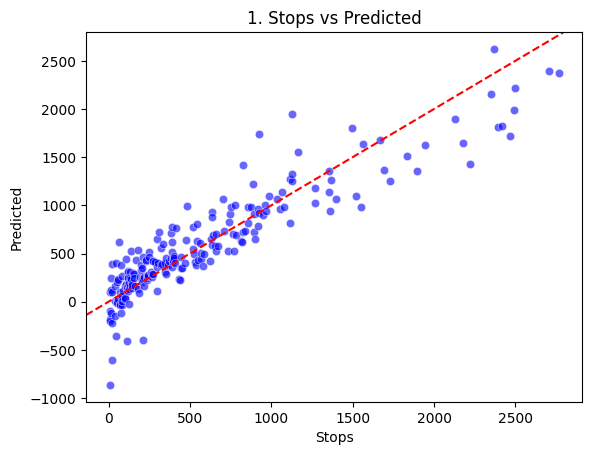

In [73]:
# Use subplots() instead of plot()
fig, ax = plt.subplots()

sns.scatterplot(
    x=data_x['stops'],
    y=m0.fittedvalues,
    color='blue',
    alpha=0.6,
    ax=ax
)

ax.axline((0, 0), slope=1, color='red', linestyle='--', label='Identity Line ($y=x$)')

ax.set_title('1. Stops vs Predicted')
ax.set_xlabel('Stops')
ax.set_ylabel('Predicted')

plt.show()

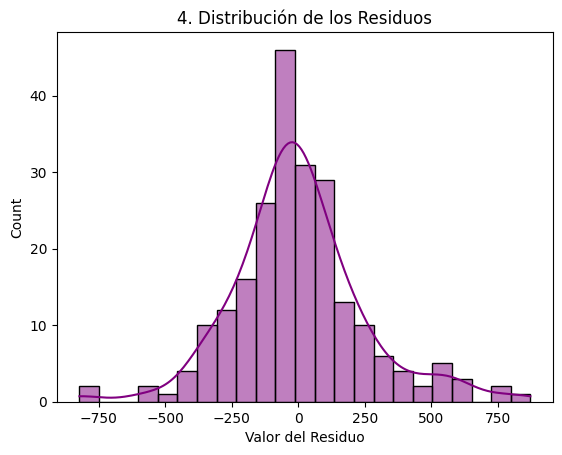

In [75]:
residuals = m0.resid
fitted_vals = m0.fittedvalues

fig, ax = plt.subplots()
sns.histplot(
    residuals,
    kde=True,
    ax=ax,
    color='purple'
    )

ax.set_title('1. Stops vs Predicted')
ax.set_title('4. Distribución de los Residuos')
ax.set_xlabel('Valor del Residuo')

plt.show()

## Modelo 1: Offset and constant term only

$$\begin{align} y_i &\sim \mathrm{Poisson}(\theta_i) \newline \theta_i &= \exp (X_i \beta) \newline X_i\beta &= \beta_0 + X_{i,1}\beta_1 + X_{i,2}\beta_2 + … + X_{i,k}\beta_k . \end{align}$$

En otra formulación:

$$
\begin{align} y_i \sim \mathrm{Poisson}(u_i \theta_i) = \mathrm{Poisson}(\exp (X_i \beta + \log(u_i))). \end{align}
$$

$u_i$ is the number of arrests by people of that ethnic group in that
precinct in the previous year as recorded by the Department of Criminal Justice
Services (DCJS).

In [7]:
model_no_indicators = sm.GLM(
    y,
    X["intercept"],
    offset=np.log(X["past.arrests"]),
    family=sm.families.Poisson(),
)

result_no_indicators = model_no_indicators.fit()

In [8]:
print(result_no_indicators.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  stops   No. Observations:                  225
Model:                            GLM   Df Residuals:                      224
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23913.
Date:                Mon, 26 Jan 2026   Deviance:                       46120.
Time:                        08:06:18   Pearson chi2:                 4.96e+04
No. Iterations:                     5   Pseudo R-squ. (CS):         -6.461e-14
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.5877      0.003   -213.058      0.0

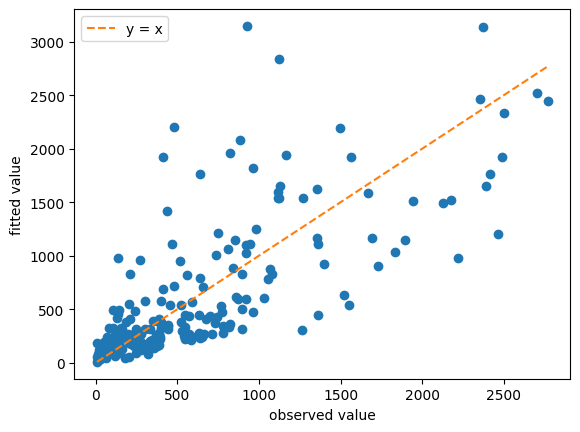

In [9]:
plt.plot(y, result_no_indicators.fittedvalues, 'o')
plt.plot(y, y, '--', label='y = x')
plt.ylabel("fitted value")
plt.xlabel("observed value")
plt.legend()
plt.show()

## Model 2: Ethnicity as predictors


In [10]:
X[['intercept', 'eth_2', 'eth_3']].sample(5)

,intercept,eth_2,eth_3
114,1,0,0
20,1,0,1
138,1,0,1
137,1,0,1
38,1,0,1


In [11]:
model_with_ethnicity = sm.GLM(
    y,
    X[['intercept', 'eth_2', 'eth_3']].astype(float),
    offset=np.log(X["past.arrests"]),
    family=sm.families.Poisson(),
)
result_with_ethnicity = model_with_ethnicity.fit()

In [12]:
print(result_with_ethnicity.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  stops   No. Observations:                  225
Model:                            GLM   Df Residuals:                      222
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23572.
Date:                Mon, 26 Jan 2026   Deviance:                       45437.
Time:                        08:06:18   Pearson chi2:                 4.94e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9519
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.5881      0.004   -155.396      0.0

## Model 3: Ethnicity & Precint as predictors

In [13]:
model_with_ethnicity_and_precinct = sm.GLM(
    y,
    X.drop(columns=["eth_1", "precinct_1", "past.arrests"]).astype(float),
    offset=np.log(X["past.arrests"]),
    family=sm.families.Poisson(),
)

result_with_ethnicity_and_precinct = model_with_ethnicity_and_precinct.fit()
print(result_with_ethnicity_and_precinct.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  stops   No. Observations:                  225
Model:                            GLM   Df Residuals:                      148
Model Family:                 Poisson   Df Model:                           76
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.9
Date:                Mon, 26 Jan 2026   Deviance:                       3427.1
Time:                        08:06:18   Pearson chi2:                 3.24e+03
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
eth_2           0.0102      0.007      1.498      

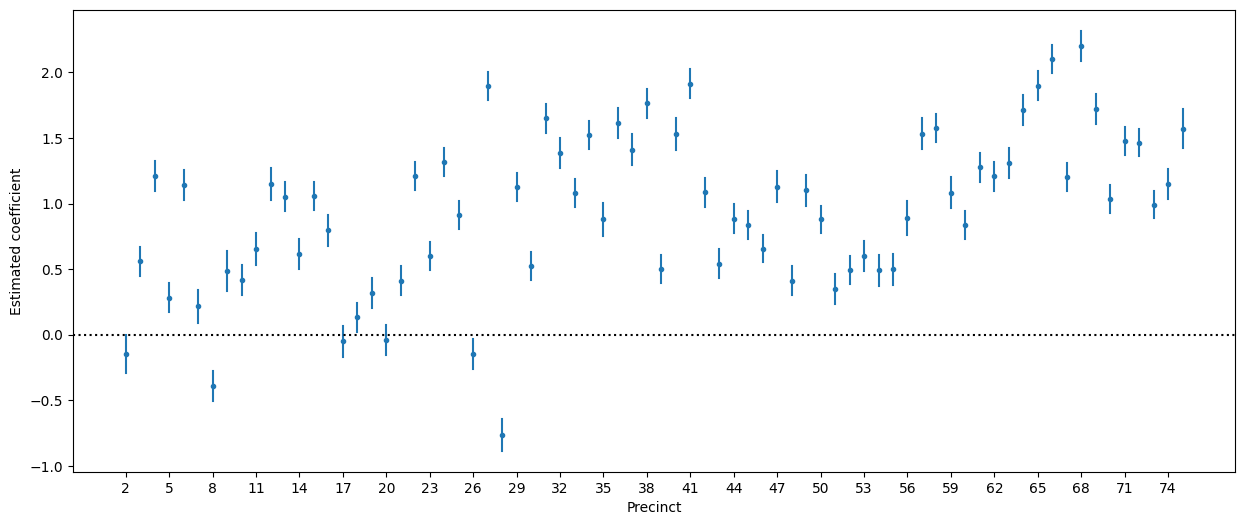

In [14]:
precinct_coefs = result_with_ethnicity_and_precinct.params.iloc[2:-1] # Only intersted in precinct
precinct_interval = result_with_ethnicity_and_precinct.conf_int().reindex(precinct_coefs.index)

plt.figure(figsize=(15, 6))
plt.plot(precinct_coefs, '.')
for precinct, interval in precinct_interval.iterrows():
    plt.plot([precinct, precinct], interval, color='C0')
plt.axhline(y=0, linestyle=':', color='black')
plt.xticks(
    precinct_coefs.index[::3],
    [int(x[1]) for x in precinct_coefs.index.str.split("_",)][::3]
)
plt.ylabel("Estimated coefficient")
plt.xlabel("Precinct")
plt.show()

In [19]:
result_with_ethnicity_and_precinct.fittedvalues

0        19.393646
1        22.778599
2        26.055081
3        32.748250
4        11.003353
          ...     
220    2384.970840
221    2353.085992
222    2440.456938
223    2644.541434
224    2675.215741
Length: 225, dtype: float64

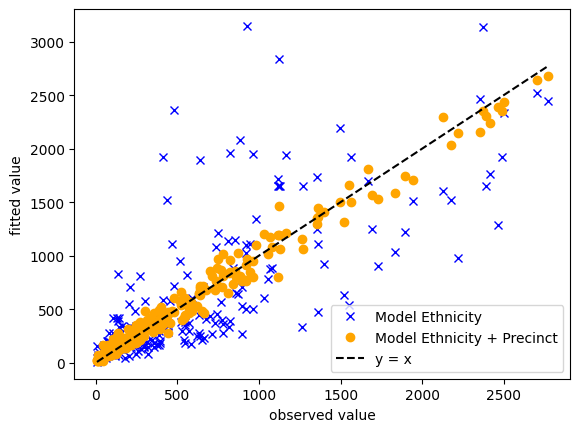

In [26]:
plt.plot(y, result_with_ethnicity.fittedvalues, 'x', color='blue', label='Model Ethnicity')
plt.plot(y, result_with_ethnicity_and_precinct.fittedvalues, 'o', color='orange', label='Model Ethnicity + Precinct')
plt.plot(y, y, '--', label='y = x', color="black")
plt.ylabel("fitted value")
plt.xlabel("observed value")
plt.legend()
plt.show()

Aunque obtuvimos un mejor modelo al combinar Precit & Ethnicity, aun vemos sesgos en los residuos:

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/var/folders/xp/09_m9yj956x3kbv7qgpqgd6r0000gn/T/ipykernel_59093/1904006459.py:6: SyntaxWarning: invalid escape sequence '\p'
  axes[1].axhline(y=-1, linestyle=':', color='black', label='$\pm 1$')


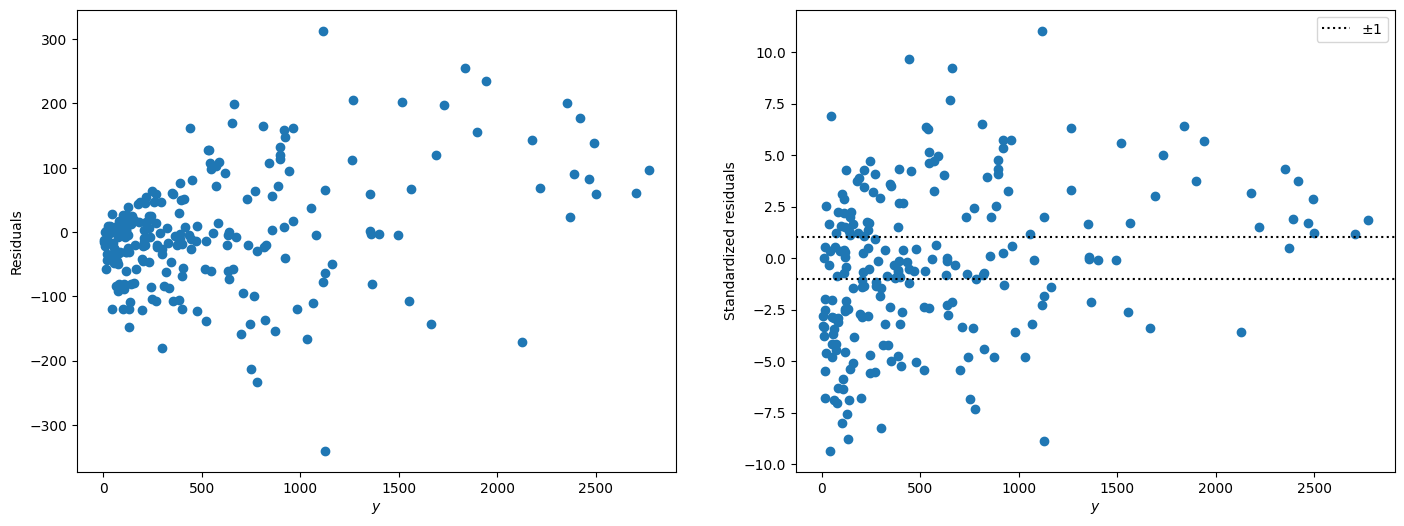

In [27]:
f, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].plot(y, result_with_ethnicity_and_precinct.resid_response, 'o')
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].plot(y, result_with_ethnicity_and_precinct.resid_pearson, 'o')
axes[1].axhline(y=-1, linestyle=':', color='black', label='$\pm 1$')
axes[1].axhline(y=+1, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

# Modelo 4: Negative Binominal Distribution

$$y\sim \mathrm{NegBinomial}(\mu, \alpha)$$

In [29]:
alpha = 0.051
model_NB = sm.GLM(
    y,
    X.drop(columns=["eth_1", "precinct_1", "past.arrests"]).astype(float),
    offset=np.log(X["past.arrests"]),
    family=sm.families.NegativeBinomial(alpha=alpha),
)

result_NB = model_NB.fit()
print(result_NB.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  stops   No. Observations:                  225
Model:                            GLM   Df Residuals:                      148
Model Family:        NegativeBinomial   Df Model:                           76
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1301.7
Date:                Mon, 26 Jan 2026   Deviance:                       243.03
Time:                        08:26:26   Pearson chi2:                     231.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.9992
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
eth_2           0.0086      0.038      0.226      

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/var/folders/xp/09_m9yj956x3kbv7qgpqgd6r0000gn/T/ipykernel_59093/4119256317.py:6: SyntaxWarning: invalid escape sequence '\p'
  axes[1].axhline(y=-1, linestyle=':', color='black', label='$\pm 1$')


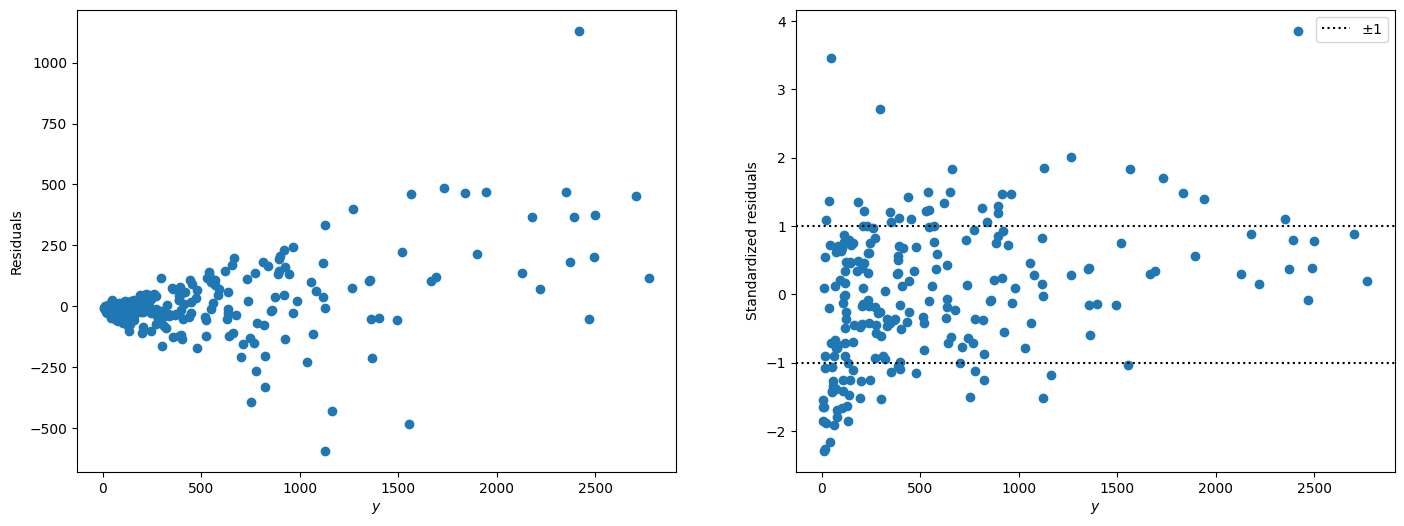

In [30]:
f, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].plot(y, result_NB.resid_response, 'o')
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].plot(y, result_NB.resid_pearson, 'o')
axes[1].axhline(y=-1, linestyle=':', color='black', label='$\pm 1$')
axes[1].axhline(y=+1, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

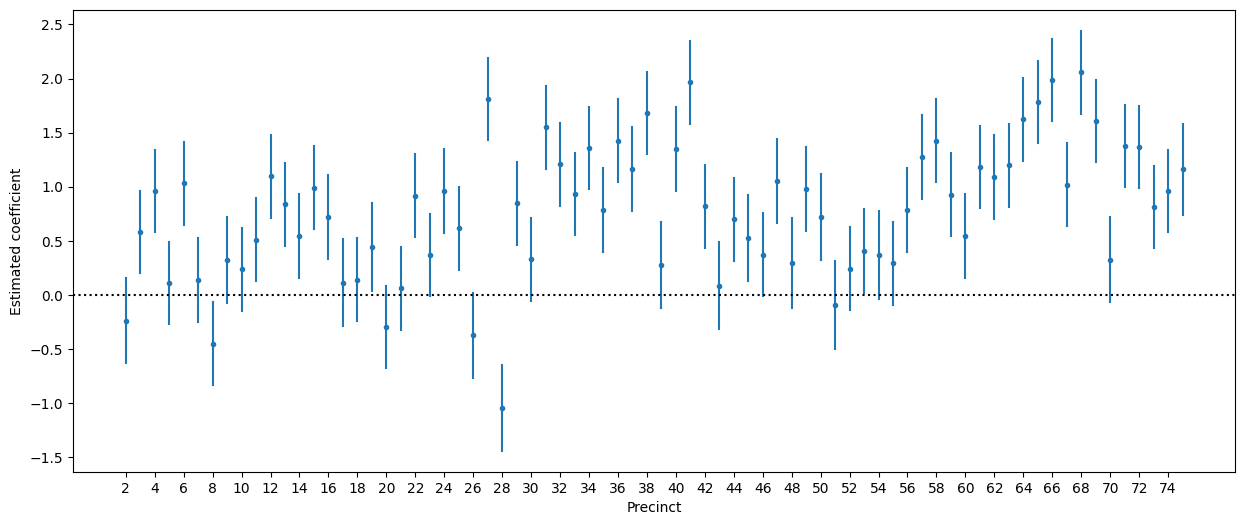

In [35]:
precinct_coefs = result_NB.params.iloc[2:-1] # Only intersted in precinct
precinct_interval = result_NB.conf_int().reindex(precinct_coefs.index)

plt.figure(figsize=(15, 6))
plt.plot(precinct_coefs, '.')
for precinct, interval in precinct_interval.iterrows():
    plt.plot([precinct, precinct], interval, color='C0')
plt.axhline(y=0, linestyle=':', color='black')
plt.xticks(
    precinct_coefs.index[::2],
    [int(x[1]) for x in precinct_coefs.index.str.split("_",)][::2]
)
plt.ylabel("Estimated coefficient")
plt.xlabel("Precinct")
plt.show()